<a href="https://colab.research.google.com/github/Svet-Bug/Projects/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22ProjectClassif_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Анализ отзывов пользователей мобильного приложения.

In [ ]:
# установка библиотеки
! pip3 list
! pip3 install sklearn

Package                       Version            
----------------------------- -------------------
absl-py                       0.12.0             
alabaster                     0.7.12             
albumentations                0.1.12             
altair                        4.1.0              
appdirs                       1.4.4              
argon2-cffi                   20.1.0             
arviz                         0.11.2             
astor                         0.8.1              
astropy                       4.2.1              
astunparse                    1.6.3              
async-generator               1.10               
atari-py                      0.2.9              
atomicwrites                  1.4.0              
attrs                         21.2.0             
audioread                     2.1.9              
autograd                      1.3                
Babel                         2.9.1              
backcall                      0.2.0              



Классификация отзывов на условно положительные "хорошие" и условно отрицательные "плохие" с использованием наивного байесовского классификатора.
Отзывы собраны из Googleplay (https://play.google.com/store/apps/details?id=ru.autoins.mobile.osagohelper&hl=ru&gl=US)и AppStore (https://apps.apple.com/ru/app/%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D0%BD%D0%B8%D0%BA-%D0%BE%D1%81%D0%B0%D0%B3%D0%BE/id1483589305).



In [ ]:
# ячейка импортов

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm

# from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [ ]:
! ls

sample_data


In [ ]:
# import os
# os.getcwd()

In [ ]:
pip install openpyxl xlsxwriter xlrd

     |████████████████████████████████| 153kB 5.2MB/s 


In [ ]:
Data = pd.read_excel('https://github.com/Svet-Bug/Projects/blob/main/Source.xlsx?raw=true', index_col='п\п')#прочитали файл Excel, 
# по умолчанию Pandas задает свою колоку с индексами, поэтому указала в качестве индексной колонки "п\п"
Data.head(20)

,Отзыв,Дата,Звезды,Имя,Оценка
п\п,,,,,
1,Не смог изменить но по телефона в настройках и...,2021-06-11,3,Bobby Digital,GOOD
2,Чудо приложение. За 3 месяца так и не запустил...,2021-06-06,1,Владимир Паршин,BAD
3,Не получается отредактировать личную информаци...,2021-06-04,3,Владимир Пупкин,GOOD
4,Не работает,2021-05-20,1,Алексей Панов,BAD
5,"При переходе на госуслуги, долго думает Надеюс...",2021-05-19,4,кидус,GOOD
6,Сделайте оповещение пострадавшего по вводу ном...,2021-05-14,4,Александр П,GOOD
7,"Го..но, не ставьте",2021-05-12,1,Alexandr Pavlov,BAD
8,Не работает.,2021-05-11,1,Egor Mall,BAD
9,"Установил приложение и первое, что увидел: ""се...",2021-05-05,1,Emil Agadzhanyan,BAD


In [ ]:
DataRN = Data.rename(columns={"п\п": "index", "Отзыв": "content", "Дата": "Date", "Звезды":"Stars", "Имя":"Author", "Оценка":"Estimation"})
display(DataRN)

,content,Date,Stars,Author,Estimation
п\п,,,,,
1,Не смог изменить но по телефона в настройках и...,2021-06-11,3,Bobby Digital,GOOD
2,Чудо приложение. За 3 месяца так и не запустил...,2021-06-06,1,Владимир Паршин,BAD
3,Не получается отредактировать личную информаци...,2021-06-04,3,Владимир Пупкин,GOOD
4,Не работает,2021-05-20,1,Алексей Панов,BAD
5,"При переходе на госуслуги, долго думает Надеюс...",2021-05-19,4,кидус,GOOD
...,...,...,...,...,...
961,Надеюсь не воспользуюсь Идея правильная,2019-11-01,5,adeptusbonus,GOOD
962,Ставлю пятак))) Дальше поглядим. Надеюсь что о...,2019-11-01,5,Den4sss,GOOD
963,Не могу ввести свои загранправа (в формате XX-...,2019-11-01,2,paramtadam,BAD


In [ ]:
# Поcмотрим, можно ли убрать столбец, например уберем столбец "Дата"
DataRN_1 = DataRN.drop(['Date'],axis=1)

display(DataRN_1)

,content,Stars,Author,Estimation
п\п,,,,
1,Не смог изменить но по телефона в настройках и...,3,Bobby Digital,GOOD
2,Чудо приложение. За 3 месяца так и не запустил...,1,Владимир Паршин,BAD
3,Не получается отредактировать личную информаци...,3,Владимир Пупкин,GOOD
4,Не работает,1,Алексей Панов,BAD
5,"При переходе на госуслуги, долго думает Надеюс...",4,кидус,GOOD
...,...,...,...,...
961,Надеюсь не воспользуюсь Идея правильная,5,adeptusbonus,GOOD
962,Ставлю пятак))) Дальше поглядим. Надеюсь что о...,5,Den4sss,GOOD
963,Не могу ввести свои загранправа (в формате XX-...,2,paramtadam,BAD


Распределение отзывов на хорошие и плохие

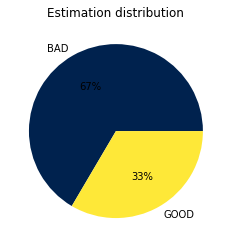

In [ ]:
classes =pd.value_counts(DataRN["Estimation"])

classes.plot(kind = 'pie',  autopct='%0.f%%', colormap='cividis') 

plt.title("Estimation distribution")

plt.ylabel('')

plt.show()

**Анализ**

Посчитать частоты слов во всех отзывах, а также отдельно в хороших и плохих, потом слова будут признаками (features) в алгоритме. 
Нужно посмотреть самые частотные слова и если они будут повторяться во всех списках, занести их в стоп-слова.

Для создания списков используем Counter из collections.

In [ ]:
Counter(" ".join(DataRN[DataRN['Estimation']=='BAD']["content"]).split()).most_common(50) 

[('не', 549),
 ('и', 352),
 ('в', 258),
 ('на', 218),
 ('Не', 188),
 ('что', 168),
 ('с', 144),
 ('приложение', 109),
 ('работает', 94),
 ('а', 81),
 ('через', 76),
 ('Приложение', 74),
 ('это', 71),
 ('по', 68),
 ('как', 67),
 ('все', 66),
 ('-', 62),
 ('нет', 60),
 ('к', 58),
 ('приложения', 54),
 ('для', 54),
 ('работает.', 52),
 ('данные', 51),
 ('у', 50),
 ('В', 50),
 ('пишет', 46),
 ('я', 46),
 ('при', 46),
 ('временно', 43),
 ('меня', 43),
 ('то', 42),
 ('ДТП', 42),
 ('только', 41),
 ('приложение.', 40),
 ('При', 39),
 ('А', 38),
 ('без', 38),
 ('от', 37),
 ('уже', 37),
 ('так', 36),
 ('если', 35),
 ('приложение,', 35),
 ('На', 34),
 ('госуслуги', 32),
 ('И', 31),
 ('о', 31),
 ('но', 30),
 ('за', 30),
 ('из', 29),
 ('хотя', 29)]

In [ ]:
# 20 самых частотных в хороших отзывах
count1 = Counter(" ".join(DataRN[DataRN['Estimation']=='GOOD']["content"]).lower().split()).most_common(30) 
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in GOOD", 1 : "count"})

# то же для плохих отзывов
count2 = Counter(" ".join(DataRN[DataRN['Estimation']=='BAD']["content"]).lower().split()).most_common(30)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in BAD", 1 : "count"})

display(df1,df2)

,words in GOOD,count
0,не,237
1,в,216
2,и,158
3,приложение,82
4,на,77
5,все,60
6,по,55
7,с,53
8,а,49
9,данные,47


,words in BAD,count
0,не,747
1,и,383
2,в,308
3,на,252
4,что,187
5,приложение,183
6,с,162
7,а,119
8,работает,98
9,как,98


Уберем стоп-слова. Поскольку отзывы на русском языке используем список из nltk с добавлением специфических для отзывов слов. Список стоп-слов в CountVectorizer добавляем через "frozenset" (неизменяемый список).

In [ ]:
! pip3 install nltk
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stops = list(stopwords.words('russian')+ ['приложение', 'приложения', 'данные','если'] )
display(stops)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [ ]:
f = feature_extraction.text.CountVectorizer(stop_words = frozenset(list(stopwords.words('russian')+ ['приложение', 'приложения', 'данные','если'] )))
display(f)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=frozenset({'а', 'без', 'более', 'больше', 'будет',
                                      'будто', 'бы', 'был', 'была', 'были',
                                      'было', 'быть', 'в', 'вам', 'вас',
                                      'вдруг', 'ведь', 'во', 'вот', 'впрочем',
                                      'все', 'всегда', 'всего', 'всех', 'всю',
                                      'вы', 'где', 'да', 'даже', 'данные', ...}),
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
DataRN["content"]

п\п
1      Не смог изменить но по телефона в настройках и...
2      Чудо приложение. За 3 месяца так и не запустил...
3      Не получается отредактировать личную информаци...
4                                            Не работает
5      При переходе на госуслуги, долго думает Надеюс...
                             ...                        
961              Надеюсь не воспользуюсь Идея правильная
962    Ставлю пятак))) Дальше поглядим. Надеюсь что о...
963    Не могу ввести свои загранправа (в формате XX-...
964    Дизайн интерфейса современный, пошаговая регис...
965    В ожидание чуда, интерфейс пока не совсем удоб...
Name: content, Length: 965, dtype: object

In [ ]:
X = f.fit_transform(DataRN["content"])

display(X.shape)
display(X.toarray())

(965, 4468)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

В результате применения метода ``.fit_transform()``  имеется 4468 уникальных слов (столбцов), которые распределены по матрице из 965 отзывов (строк). Если слово встречается в отзыве - на пересечении соотвествующего столбца и строки стоит значение 1, если не встречается - 0.

дальше предполагается предсказать, является ли отзыв "хорошим" (обозначим его 1) или "плохим" (0).

In [ ]:
DataRN

,content,Date,Stars,Author,Estimation
п\п,,,,,
1,Не смог изменить но по телефона в настройках и...,2021-06-11,3,Bobby Digital,GOOD
2,Чудо приложение. За 3 месяца так и не запустил...,2021-06-06,1,Владимир Паршин,BAD
3,Не получается отредактировать личную информаци...,2021-06-04,3,Владимир Пупкин,GOOD
4,Не работает,2021-05-20,1,Алексей Панов,BAD
5,"При переходе на госуслуги, долго думает Надеюс...",2021-05-19,4,кидус,GOOD
...,...,...,...,...,...
961,Надеюсь не воспользуюсь Идея правильная,2019-11-01,5,adeptusbonus,GOOD
962,Ставлю пятак))) Дальше поглядим. Надеюсь что о...,2019-11-01,5,Den4sss,GOOD
963,Не могу ввести свои загранправа (в формате XX-...,2019-11-01,2,paramtadam,BAD


Разделим данные на обучающую и тестовую выборку  функцией sklearn.model_selection.train_test_split

In [ ]:
DataRN["Estimation"]=DataRN["Estimation"].map({"GOOD":1,"BAD":0})

DataRN

,content,Date,Stars,Author,Estimation
п\п,,,,,
1,Не смог изменить но по телефона в настройках и...,2021-06-11,3,Bobby Digital,1
2,Чудо приложение. За 3 месяца так и не запустил...,2021-06-06,1,Владимир Паршин,0
3,Не получается отредактировать личную информаци...,2021-06-04,3,Владимир Пупкин,1
4,Не работает,2021-05-20,1,Алексей Панов,0
5,"При переходе на госуслуги, долго думает Надеюс...",2021-05-19,4,кидус,1
...,...,...,...,...,...
961,Надеюсь не воспользуюсь Идея правильная,2019-11-01,5,adeptusbonus,1
962,Ставлю пятак))) Дальше поглядим. Надеюсь что о...,2019-11-01,5,Den4sss,1
963,Не могу ввести свои загранправа (в формате XX-...,2019-11-01,2,paramtadam,0


Далее - по тетрадке из соответствующего занятия.

Создадим новые переменные:
- X_train - кусочек матрицы "документ/термин", который мы "отдадим" алгоритму для обучения
- X_test - кусочек матрицы "документ/термин", на котором будем проверять, как алгоритм сработал 
- y_train - кусочек датафрейма с текстами, который мы отдадим для обучения
- y_test -  кусочек датафрейма с текстами, на котором будем проверять, как алгоритм сработал 

In [ ]:
# новые переменные
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, DataRN['Estimation'], 
                                                                    test_size=0.2, random_state=50)

print(X_train.shape, X_test.shape)
sum(y_test == 1)

(772, 4468) (193, 4468)


67

алгоритмов наивного байеса несколько, мы возьмем [Multinomial NB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

[дополнительная информация про Naive Bayes](https://nlp.stanford.edu/IR-book/pdf/13bayes.pdf)

Так как алгоритм быстрый, попробуем несколько вариантов с разным параметром регуляризации α *([что такое α ?](https://medium.com/syncedreview/applying-multinomial-naive-bayes-to-nlp-problems-a-practical-explanation-4f5271768ebf))*

Затем для каждого проверим Precision, Recall и Accuracy

In [ ]:
list_alpha = np.arange(1/100000, 20, 0.11) 
#возьмем лист равномерно распределенных значений от 1/100000 до 60(можно выбрать другие числа,эти были выбраны экспериментально)


score_train = np.zeros(len(list_alpha)) # задали пустые списки по длине изначального листа
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0

In [ ]:
for alpha in list_alpha: # для каждого значения в списке альф
    bayes = naive_bayes.MultinomialNB(alpha=alpha) # используем модель
    bayes.fit(X_train, y_train) # тренируем модель
    
    score_train[count] = bayes.score(X_train, y_train) # итерируемся по индексу в листе, добавляем значения accuracy
    # score_train? 
    
    score_test[count]= bayes.score(X_test, y_test)
    # score_test ? 
    
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    
    count = count + 1 # после одной итерации, делаем новый шаг

посмотрим на 10 лучших моделей

In [ ]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])


display(models.head(10))

display(matrix.shape)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.976684,0.782383,0.701493,0.681159
1,0.11001,0.968912,0.777202,0.805970,0.642857
2,0.22001,0.968912,0.766839,0.820896,0.625000
3,0.33001,0.965026,0.761658,0.820896,0.617978
4,0.44001,0.962435,0.761658,0.820896,0.617978
5,0.55001,0.959845,0.766839,0.820896,0.625000
6,0.66001,0.958549,0.777202,0.820896,0.639535
7,0.77001,0.954663,0.777202,0.805970,0.642857
8,0.88001,0.950777,0.777202,0.791045,0.646341
9,0.99001,0.949482,0.787565,0.776119,0.666667


(182, 5)


а теперь давайте оставим модель с наивысшей test precision

In [ ]:
best_index = models['Test Precision'].idxmax()
best_index

# display(best_index)

display(models.iloc[best_index])

alpha             17.710010
Train Accuracy     0.786269
Test Accuracy      0.709845
Test Recall        0.194030
Test Precision     0.866667
Name: 161, dtype: float64

Посмотрим, есть ли модели со 100% Precision

In [ ]:
models[models['Test Recall']>0.6].sort_values(by="Test Precision", ascending = False)


,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
26,2.86001,0.914508,0.782383,0.611940,0.719298
22,2.42001,0.923575,0.787565,0.641791,0.716667
25,2.75001,0.918394,0.777202,0.611940,0.706897
24,2.64001,0.918394,0.777202,0.611940,0.706897
23,2.53001,0.920984,0.777202,0.611940,0.706897
19,2.09001,0.932642,0.782383,0.686567,0.686567
18,1.98001,0.933938,0.782383,0.686567,0.686567
17,1.87001,0.933938,0.782383,0.686567,0.686567
20,2.20001,0.928756,0.777202,0.671642,0.681818
16,1.76001,0.936528,0.782383,0.701493,0.681159


Давайте из них выберем те, у которых наибольшее accuracy

In [ ]:
best_index = models[models['Test Precision']>=0.6]['Test Accuracy'].idxmax()

models.iloc[best_index]


alpha             0.990010
Train Accuracy    0.949482
Test Accuracy     0.787565
Test Recall       0.776119
Test Precision    0.666667
Name: 9, dtype: float64

### сделаем предикшн

In [ ]:
bayes = naive_bayes.MultinomialNB(alpha= 0.990010) # используем лучшую модель
bayes.fit(X_train, y_train) # тренируем алгоритм на данных

bayes.predict(X_test) # метод для предсказания

# сделаем датафрейм с колонками для настоящего класса и для предсказанного

new_df = pd.DataFrame(data = y_test)
new_df["predicted"]=bayes.predict(X_test) # добавляем новую колонку с предсказаниями

new_df

,Estimation,predicted
п\п,,
542,1,0
894,0,1
501,1,1
736,0,1
515,1,1
...,...,...
281,1,1
396,0,0
324,0,1


давайте построим матрицу ошибок ([как работает матрица ошибок](https://en.wikipedia.org/wiki/Confusion_matrix))

In [ ]:
m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))


pd.DataFrame(data = m_confusion_test, columns = ['Предсказан плохой', 'Передсказан хороший'],
            index = ['Реально плохой', 'Реально хороший'])

,Предсказан плохой,Передсказан хороший
Реально плохой,100,26
Реально хороший,15,52


# Support Vector Machines (SVM, метод опорных векторов)

попробуем сделать ту же задачу, с алгоритмом SVM

In [ ]:
list_C = np.arange(500, 2000, 100) #100000

score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1 

посмотрим на 10 первых моделей и их метрики:

In [ ]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,0.997409,0.704663,0.432836,0.604167
1,600.0,0.997409,0.704663,0.432836,0.604167
2,700.0,0.997409,0.704663,0.432836,0.604167
3,800.0,0.997409,0.704663,0.432836,0.604167
4,900.0,0.997409,0.704663,0.432836,0.604167
5,1000.0,0.997409,0.704663,0.432836,0.604167
6,1100.0,0.997409,0.704663,0.432836,0.604167
7,1200.0,0.997409,0.704663,0.432836,0.604167
8,1300.0,0.997409,0.704663,0.432836,0.604167
9,1400.0,0.997409,0.704663,0.432836,0.604167


выберем модель с лучшим test precision

In [ ]:
best_index = models['Test Precision'].idxmax()

display(models.iloc[best_index, :])

C                 500.000000
Train Accuracy      0.997409
Test Accuracy       0.704663
Test Recall         0.432836
Test Precision      0.604167
Name: 0, dtype: float64

In [ ]:
# посмотрим на модели с почти 100% Precision

models[models['Test Precision']>0.6].head(5)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,0.997409,0.704663,0.432836,0.604167
1,600.0,0.997409,0.704663,0.432836,0.604167
2,700.0,0.997409,0.704663,0.432836,0.604167
3,800.0,0.997409,0.704663,0.432836,0.604167
4,900.0,0.997409,0.704663,0.432836,0.604167


In [ ]:
best_index = models[models['Test Precision']>0.6]['Test Accuracy'].idxmax()
svc = svm.SVC(C=list_C[best_index])
svc.fit(X_train, y_train)
models.iloc[best_index, :]

C                 500.000000
Train Accuracy      0.997409
Test Accuracy       0.704663
Test Recall         0.432836
Test Precision      0.604167
Name: 0, dtype: float64

построим матрицу ошибок для SVM

In [ ]:
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Предсказан плохой', 'Предсказан хороший'],
            index = ['Реально плохой', 'Реально хороший'])

,Предсказан плохой,Предсказан хороший
Реально плохой,107,19
Реально хороший,38,29


Попробую кластеризацию

In [ ]:
import matplotlib.pyplot as plt # viz
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer # векторизация текстов
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD, NMF # dimred

from sklearn.datasets import fetch_20newsgroups # data

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# зададим несколько переменных, будем использовать их как параметры функций

n_samples = 2000 # размер корпуса
n_features = 1000 # максимальное количество слов в матрице "слово x документ" (= top1000 частотных их всех в корпусе)
n_components = 4 # число тем в корпусе
n_top_words = 20 # порог частотности для визуализаций

In [ ]:
# если возникает ошибка загрузки, раскомментьте ячейки ниже
# import ssl
# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context


data = DataRN['content']
data

п\п
1      Не смог изменить но по телефона в настройках и...
2      Чудо приложение. За 3 месяца так и не запустил...
3      Не получается отредактировать личную информаци...
4                                            Не работает
5      При переходе на госуслуги, долго думает Надеюс...
                             ...                        
961              Надеюсь не воспользуюсь Идея правильная
962    Ставлю пятак))) Дальше поглядим. Надеюсь что о...
963    Не могу ввести свои загранправа (в формате XX-...
964    Дизайн интерфейса современный, пошаговая регис...
965    В ожидание чуда, интерфейс пока не совсем удоб...
Name: content, Length: 965, dtype: object

In [ ]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, # игнорируем слова,которые только в 1 доке или в 95% документов.
                                max_features=n_features,
                                stop_words=stops)

tf = tf_vectorizer.fit_transform(data)

In [ ]:
display(type(tf_vectorizer))
display(type(tf))

sklearn.feature_extraction.text.CountVectorizer

scipy.sparse.csr.csr_matrix

In [ ]:
display(tf.shape) # матрица "слова x документы"

tf_vectorizer.get_feature_names()[900:920]

(965, 1000)

['тратьте',
 'требует',
 'требуется',
 'тс',
 'туда',
 'тупо',
 'уберите',
 'уважаемые',
 'уведомление',
 'углу',
 'удалил',
 'удалить',
 'удалось',
 'удаляю',
 'удаётся',
 'удобно',
 'удобное',
 'удобный',
 'удостоверение',
 'удостоверения']

Теперь отдадим эту матрицу алгоритму снижения размерности

параметры в скобках:

n_components: число тем в корпусе
max_iter: количество итераций алгоритма
learning_offset: параметр, который занижает значение ранних итераций (тк более важная часть обучения случается на поздних), обычно устанавливается больше чем 1

In [ ]:
lda = LatentDirichletAllocation(n_components=n_components, max_iter=20,learning_offset=50)

lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=50,
                          max_doc_update_iter=100, max_iter=20,
                          mean_change_tol=0.001, n_components=4, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [ ]:
lda.components_.shape

(4, 1000)

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    
    fig, axes = plt.subplots(1, 4, figsize=(30, 15)) # параметры отображения 
    axes = axes.flatten()
    all_features = {} # словарь для сохранения ключевых слов для тем
    
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1] 
        top_features = [feature_names[i] for i in top_features_ind]
        # строка для сохранения темы и слов в словарь
        
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.show()

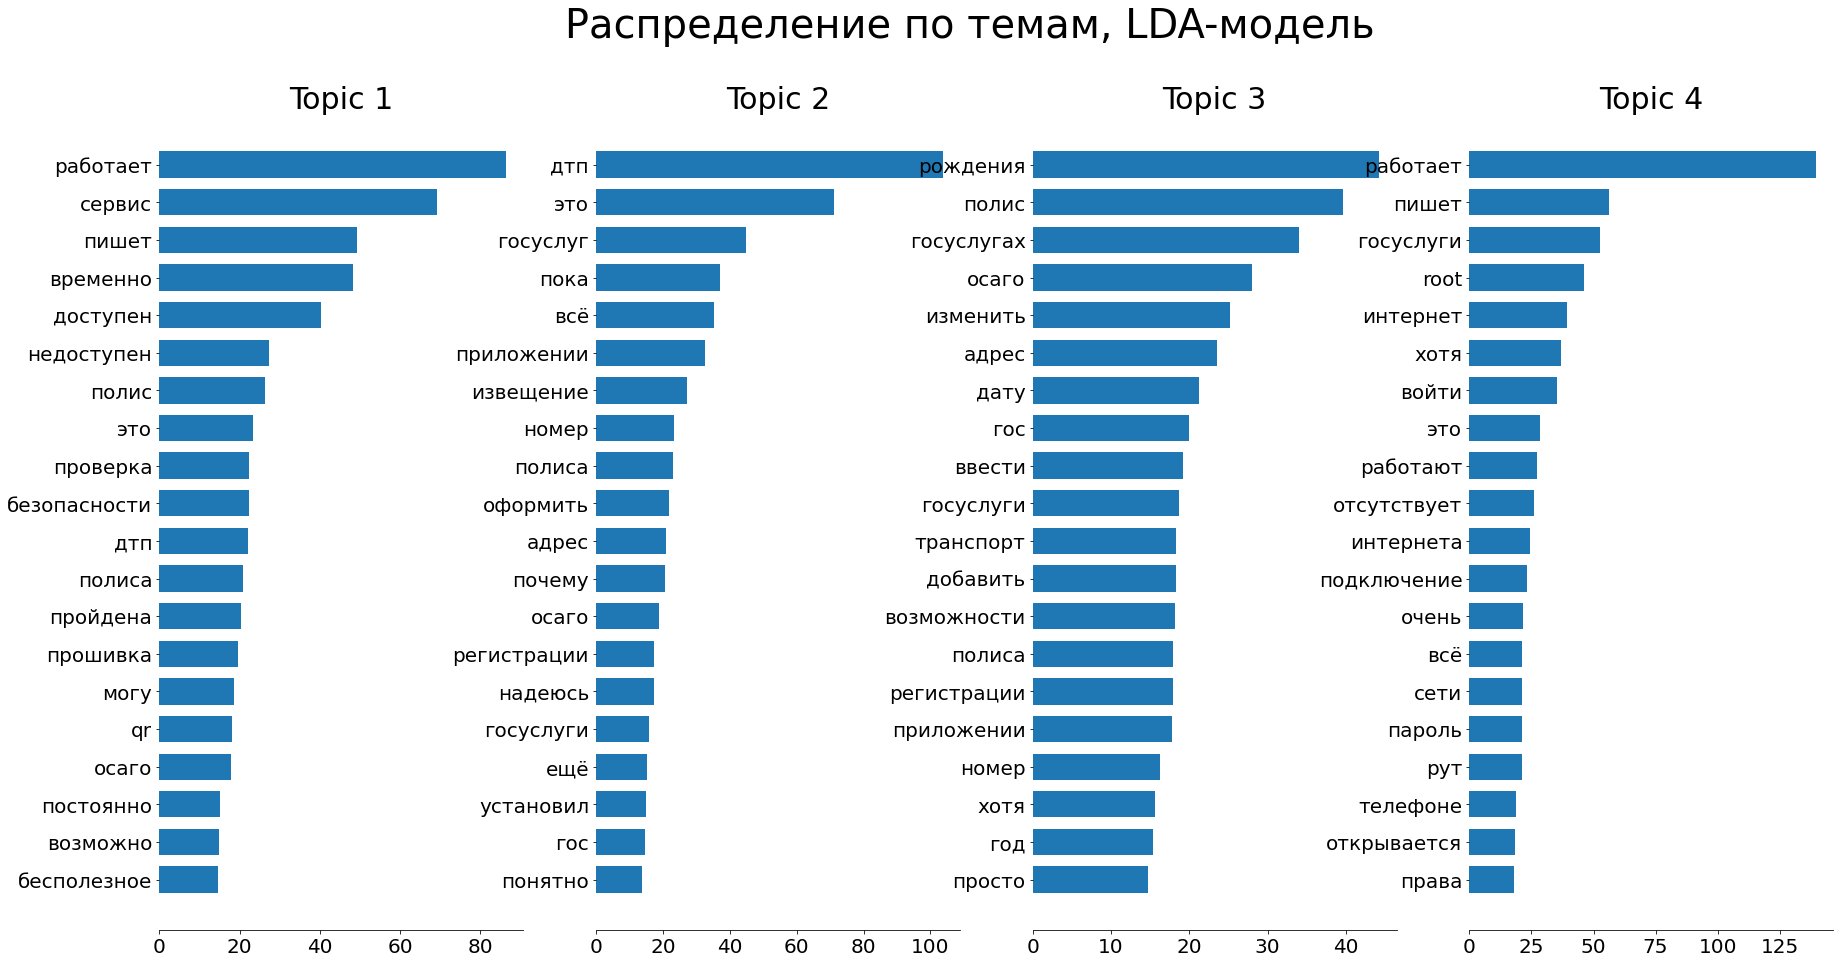

In [ ]:
tf_feature_names = tf_vectorizer.get_feature_names()

plot_top_words(lda, tf_feature_names, n_top_words, 'Распределение по темам, LDA-модель')

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    all_features = {}
    
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
#         all_features.update((topic_idx," ".join([feature_names[i]
#                         for i in topic.argsort()[:-n_top_words - 1:-1]]).split()))
#     return all_features


In [ ]:
print_top_words(lda,tf_feature_names, n_top_words)

Topic #0:
работает пишет это root госуслуги интернет хотя рут телефон телефоне работают отсутствует интернета прошивка подключение запускается безопасности проверка qr сети
Topic #1:
всё полис полиса дтп добавить приложении осаго номер госуслуги код возможности пока госуслугах удалил вход пожалуйста фото ввести возможно отлично
Topic #2:
адрес дтп это регистрации госуслуг изменить приложении госуслугах могу гос фото всем данных почему удостоверения приложением извещение водительского нужно доступ
Topic #3:
дтп сервис работает временно рождения пишет доступен это осаго полис госуслуги недоступен могу почему дату европротокол области госуслуг спасибо нужно


Распределение отзывов по темам https://stackoverflow.com/questions/45145368/python-scikit-learn-get-documents-per-topic-in-lda

In [ ]:
doc_topic = lda.transform(tf)
display(doc_topic)

array([[0.03591503, 0.68471028, 0.03921473, 0.24015996],
       [0.03873023, 0.03626706, 0.1894602 , 0.7355425 ],
       [0.49741422, 0.41258597, 0.04433926, 0.04566055],
       ...,
       [0.02357664, 0.02315611, 0.93016706, 0.02310019],
       [0.05330042, 0.05975538, 0.05066241, 0.83628179],
       [0.04197544, 0.57291506, 0.04168443, 0.34342508]])

In [ ]:
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()
    x = "doc: {} topic: {}\n".format(n,topic_most_pr)
    a = {n,topic_most_pr}
    df=pd.DataFrame(a)
    
    print(a)


{0, 1}
{1, 3}
{0, 2}
{3}
{1, 4}
{1, 5}
{0, 6}
{3, 7}
{8, 0}
{0, 9}
{10, 2}
{3, 11}
{3, 12}
{3, 13}
{0, 14}
{3, 15}
{16, 1}
{17, 2}
{18, 3}
{0, 19}
{2, 20}
{1, 21}
{2, 22}
{0, 23}
{24, 2}
{25, 3}
{0, 26}
{2, 27}
{0, 28}
{3, 29}
{1, 30}
{1, 31}
{32, 1}
{33, 2}
{34, 3}
{0, 35}
{1, 36}
{1, 37}
{1, 38}
{1, 39}
{40, 1}
{41, 1}
{1, 42}
{2, 43}
{2, 44}
{3, 45}
{0, 46}
{0, 47}
{48, 2}
{49, 1}
{1, 50}
{2, 51}
{1, 52}
{2, 53}
{0, 54}
{2, 55}
{56, 1}
{0, 57}
{58, 3}
{3, 59}
{1, 60}
{3, 61}
{0, 62}
{0, 63}
{64, 0}
{65, 1}
{66, 3}
{3, 67}
{3, 68}
{0, 69}
{3, 70}
{3, 71}
{72, 1}
{0, 73}
{1, 74}
{2, 75}
{3, 76}
{0, 77}
{0, 78}
{3, 79}
{80, 3}
{0, 81}
{82, 3}
{0, 83}
{1, 84}
{1, 85}
{2, 86}
{2, 87}
{88, 1}
{89, 1}
{0, 90}
{0, 91}
{2, 92}
{3, 93}
{1, 94}
{3, 95}
{96, 3}
{97, 3}
{98, 3}
{2, 99}
{2, 100}
{3, 101}
{1, 102}
{0, 103}
{104, 1}
{105, 2}
{106, 2}
{1, 107}
{3, 108}
{3, 109}
{1, 110}
{1, 111}
{112, 1}
{113, 3}
{1, 114}
{2, 115}
{3, 116}
{2, 117}
{0, 118}
{0, 119}
{120, 3}
{121, 3}
{122, 3}
{3, 12